# **K18411C - NHÓM BEST**
1. VŨ QUANG HUY - K184111445
2. LÊ TRẦN GIẢN ĐƠN - K184111442
3. ĐỖ NGUYỄN NHẬT HÀN - K184111444
4. PHAN HỒNG OANH - K184111457

In [ ]:
from google.colab import files
# Tải file lên Drive
uploaded = files.upload()

Saving FinalProject_RawData.xlsx to FinalProject_RawData.xlsx


# **ĐỌC FILE EXCEL , FILE KẾT QUẢ THU ĐƯỢC TỪ CRAWL DỮ LIỆU JAVA - ECLIPSE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter
from wordcloud import WordCloud 
import seaborn as sns
import re
sns.set()
!pip install feedparser
#!pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
import os
import sys
import feedparser
from bs4 import BeautifulSoup
from nltk import clean_html

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#đọc file excel 
# Tài file có tên FinalProject_RawData.xlsx lên Google Colab
data = pd.read_excel("FinalProject_RawData.xlsx")

In [ ]:
data

,Content,Place,User Location,Hashtags
0,"Every Friday, we publish our weekly #Cardano d...",NaN,Netherlands,[Cardano]
1,@luis_adaime @elonmusk @moss_earth @MCo2token ...,NaN,Brasil,[]
2,@iamtheidentity @IOHK_Charles doesn't control ...,NaN,United States,[]
3,Another stake increase by one of our existing ...,NaN,NaN,"[Cardano, ada]"
4,@CardanoDan Fundamentals.\n Technology.\n Phil...,NaN,Canada,[cardano]
...,...,...,...,...
6213,This guy predictions are making 5x pretty quic...,NaN,NaN,"[crypto, bitcoin]"
6214,@RoslynLayton @ChinaTechThreat $xrp thanks,NaN,NaN,[]
6215,NVIDIA Isn’t Done Making Graphics Cards ‘Less ...,NaN,NaN,[]
6216,Free Ethereum - Earn $65 free eth in 5 minutes...,NaN,NaN,"[ethereum, freeeth, geteth]"


In [ ]:
# Thông tin về số dòng dữ liệu đào được
data.shape

(6218, 4)

In [ ]:
# Thông tin về cột, null, non-null, phân loại dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content        6218 non-null   object
 1   Place          51 non-null     object
 2   User Location  2210 non-null   object
 3   Hashtags       6218 non-null   object
dtypes: object(4)
memory usage: 194.4+ KB


# **PHÂN TÍCH CÁC KHU VỰC QUAN TÂM NHIỀU ĐẾN CRYPTOCURRENCY**

In [ ]:
#Thống kê sơ lược về số liệu liên quan đến khu vực:
## Lượng post theo khu vực
## Quan tâm của từng đồng theo khu vực
## So sánh mức độ phổ biến với khu vực sở hữu tiền ảo https://www.statista.com/statistics/1195753/bitcoin-trading-selected-countries/



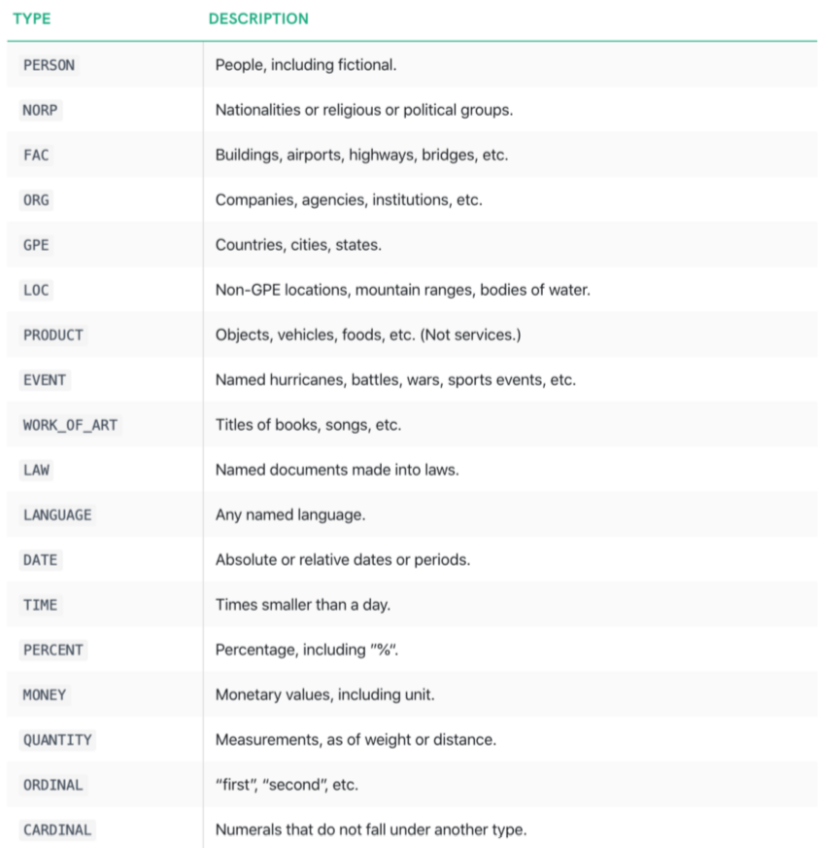

In [ ]:
# List các giá trị của cột User Location
arr=[]

for i in data['User Location']:
    arr.append(i)

In [ ]:
# !pip install spacy
# !python -m spacy download xx_ent_wiki_sm
# !python -m spacy download en_core_web_sm
import spacy as sp

In [ ]:
#nlp = sp.load("xx_ent_wiki_sm")
nlp = sp.load("en_core_web_sm")
txt=""
for text in arr:
  if(str(text)!="nan"):
    txt+= str(text)+", "
doc = nlp(txt)
gpe=[]
for ent in doc.ents:
  if(ent.label_=="GPE"):
    gpe.append(ent.text)

In [ ]:
dem2=Counter(gpe).most_common()[:]

In [ ]:
a=[]
b=[]
for i in dem2:
  a.append(i[0])
  b.append(i[1])
data4= pd.DataFrame({"GPE": a,"Total":b})
data4[:10] #10 địa điểm có lượt nhắc đến cao nhất

,GPE,Total
0,United States,915
1,India,172
2,England,146
3,Canada,82
4,Nigeria,64
5,Indonesia,59
6,South Africa,56
7,Australia,54
8,Türkiye,52
9,Germany,40


# **PHÂN TÍCH SENTIMENT CỦA TỪNG LOẠI TIỀN MÃ HÓA**

In [ ]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Làm sạch dữ liệu (loại bỏ những thứ không cần thiết, chuyển thành chữ thường ...)
arrSen=[]
for i in data['Content']:
  i=i.lower()
  i = re.sub(r"http\S+", " ", i)
  i = re.sub(r'[^a-zA-Z0-9\n\.]', " ", i)
  i = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', ' ', i)
  arrSen.append(i)
#arrSen

In [ ]:
compound=[]
neg=[]
neu=[]
pos=[]
analyzer = SentimentIntensityAnalyzer()
for i in arrSen:
  compound.append(analyzer.polarity_scores(i)['compound'])
  neg.append(analyzer.polarity_scores(i)['neg'])
  neu.append(analyzer.polarity_scores(i)['neu'])
  pos.append(analyzer.polarity_scores(i)['pos'])
dataSen= pd.DataFrame({"Content": arrSen,"compound":compound,"neg": neg,"neu": neu,"pos":pos})
dataSen

,Content,compound,neg,neu,pos
0,every friday we publish our weekly cardano d...,-0.2648,0.098,0.902,0.000
1,luis adaime elonmusk moss earth mco2token ...,-0.4404,0.146,0.854,0.000
2,iamtheidentity iohk charles doesn t control ...,-0.4404,0.293,0.707,0.000
3,another stake increase by one of our existing ...,0.7717,0.000,0.628,0.372
4,cardanodan fundamentals.\n technology.\n phil...,0.0000,0.000,1.000,0.000
...,...,...,...,...,...
6213,this guy predictions are making 5x pretty quic...,0.4939,0.000,0.833,0.167
6214,roslynlayton chinatechthreat xrp thanks,0.4404,0.000,0.508,0.492
6215,nvidia isn t done making graphics cards less ...,0.2516,0.000,0.833,0.167
6216,free ethereum earn 65 free eth in 5 minutes...,0.7650,0.000,0.577,0.423


In [ ]:
# tính toán tổng số Compound cho mỗi loại tiền
lstSen=[(["bitcoin", "btc"],0.0,0),(["eth","ethereum"],0.0,0),(["bnb","binance"],0.0,0),(["doge","dogecoin"],0.0,0),(["ada","cardano"],0.0,0),
     (["usdt","tether"],0.0,0),(["xrp"],0.0,0),(["dot","polkadot"],0.0,0),(["bch","bitcoin cash","bitcoincash"],0.0,0),(["ltc","litecoin"],0.0,0)]

for i in range(dataSen.shape[0]):
  num=dataSen.iloc[i]['Content']
  for j in range(len(lstSen)):
    lstSen2=list(lstSen[j])
    for k in lstSen[j][0]:
      if k in str(num):
        lstSen2[1]+=dataSen.iloc[i]['compound']
        lstSen2[2]+= 1
      break
    lstSen[j]=tuple(lstSen2)

lstSen

[(['bitcoin', 'btc'], 321.91630000000094, 2857),
 (['eth', 'ethereum'], 105.9477999999998, 752),
 (['bnb', 'binance'], 29.16890000000001, 119),
 (['doge', 'dogecoin'], 185.56790000000007, 1384),
 (['ada', 'cardano'], 33.11670000000001, 199),
 (['usdt', 'tether'], 12.1357, 76),
 (['xrp'], 106.06889999999984, 574),
 (['dot', 'polkadot'], 18.81299999999999, 138),
 (['bch', 'bitcoin cash', 'bitcoincash'], 3.7156999999999996, 24),
 (['ltc', 'litecoin'], 10.4258, 79)]

In [ ]:
#bảng 
obj=[]
comp=[]
for i in lstSen:
  obj.append(i[0])
  comp.append(i[1]/i[2])
table= pd.DataFrame({"Tiền mã hóa":obj,"Compound":comp})
table

,Tiền mã hóa,Compound
0,"[bitcoin, btc]",0.112676
1,"[eth, ethereum]",0.140888
2,"[bnb, binance]",0.245117
3,"[doge, dogecoin]",0.134081
4,"[ada, cardano]",0.166416
5,"[usdt, tether]",0.159680
6,[xrp],0.184789
7,"[dot, polkadot]",0.136326
8,"[bch, bitcoin cash, bitcoincash]",0.154821
9,"[ltc, litecoin]",0.131972


In [ ]:
# Tổng quan đánh giá của người dùng đối với thị trường tiền mã hóa
DanhGia=[0,0,0,0,0,0,0,0]
for i in range(dataSen.shape[0]):
  num=dataSen.iloc[i]['compound']
  if (num <= -0.75):
    DanhGia[0]+=1
  elif (num <=-0.5):
    DanhGia[1]+=1
  elif (num <=-0.25):
    DanhGia[2]+=1
  elif (num <=0):
    DanhGia[3]+=1
  elif (num <=0.25):
    DanhGia[4]+=1
  elif (num <=0.5):
    DanhGia[5]+=1
  elif (num <=0.75):
    DanhGia[6]+=1
  else :   
    DanhGia[7]+=1
label=["-1.0 : -0.75","-0.75 : -0.5","-0.5 : -0.25","-0.25 : 0","0 : 0.25","0.25 : 0.5","0.5 : 0.75","0.75 : 1"]
table2=pd.DataFrame({"Khoảng Compound":label,"Số lượng":DanhGia})
table2

,Khoảng Compound,Số lượng
0,-1.0 : -0.75,70
1,-0.75 : -0.5,286
2,-0.5 : -0.25,457
3,-0.25 : 0,2715
4,0 : 0.25,365
5,0.25 : 0.5,1167
6,0.5 : 0.75,766
7,0.75 : 1,392


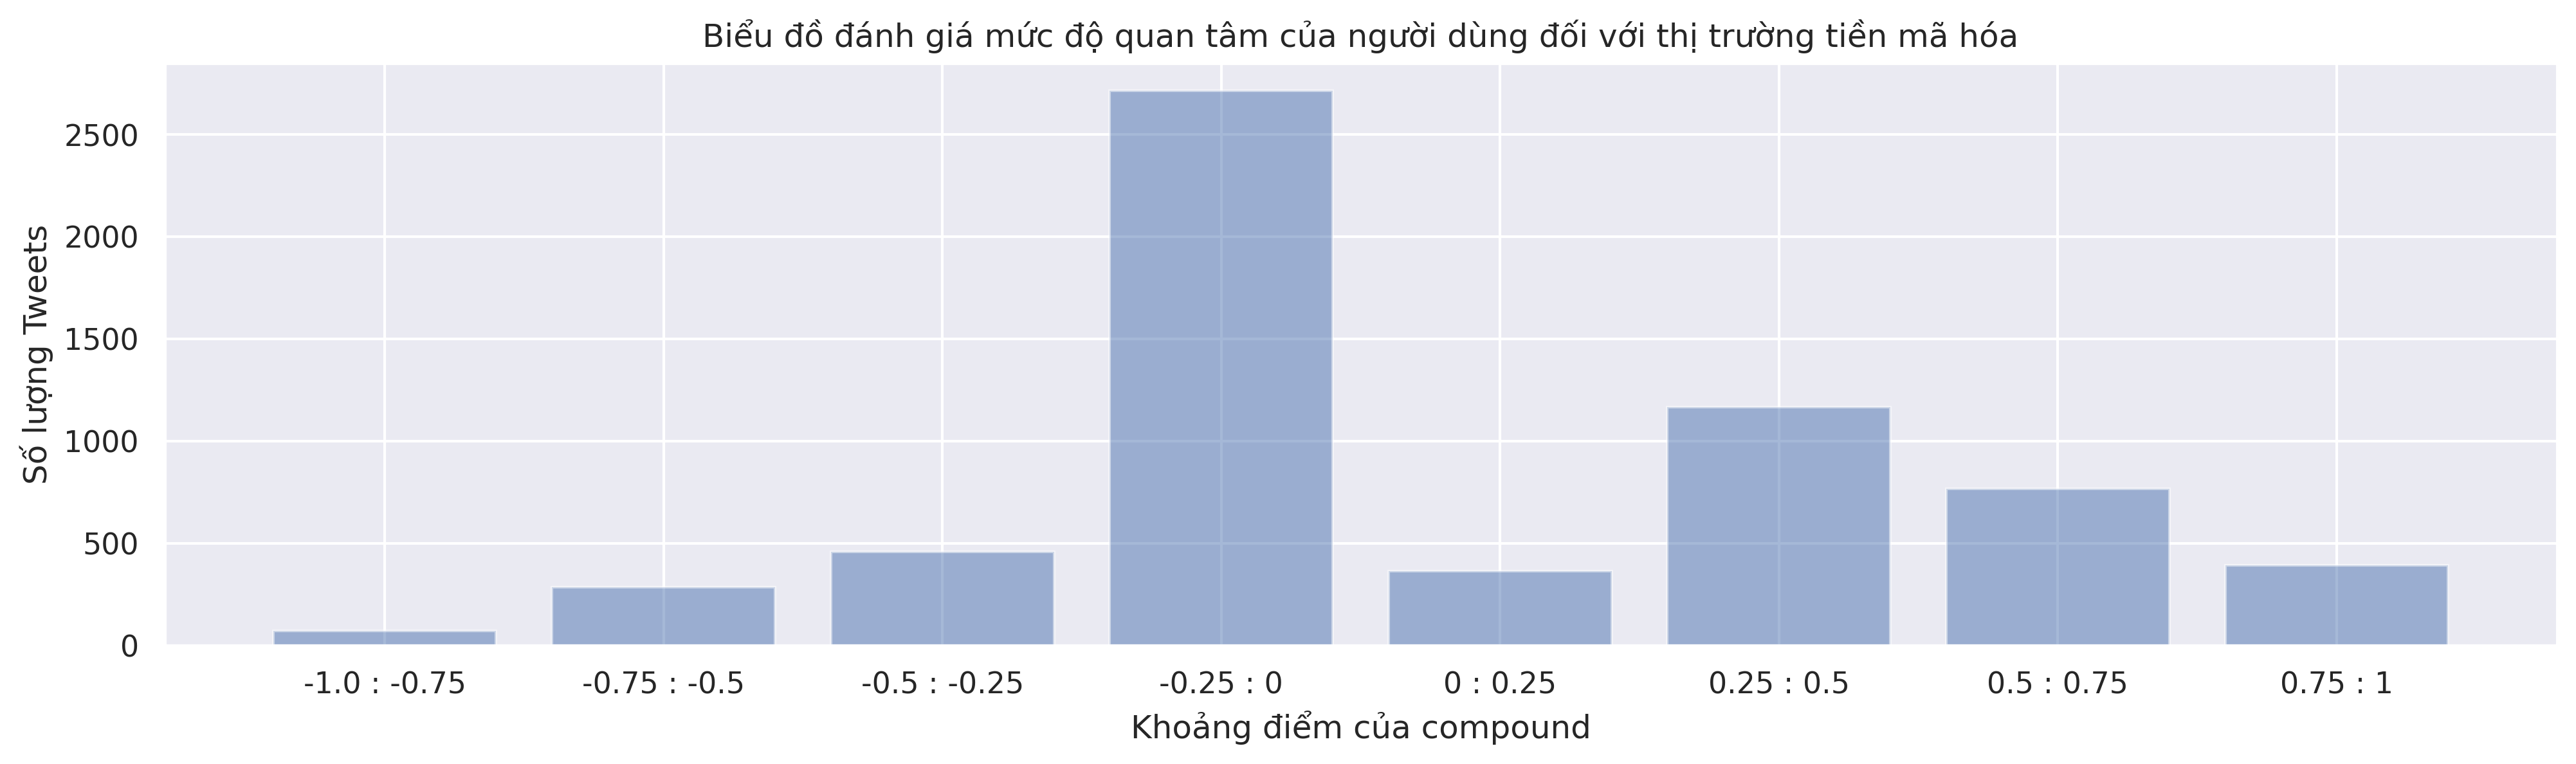

In [ ]:
# Biểu đồ đánh giá mức độ quan tâm của người dùng đối với thị trường tiền mã hóa
import matplotlib.pyplot as plt
x = table2['Khoảng Compound']
y = table2['Số lượng']
plt.figure(figsize=(16,4), dpi=300)
plt.bar(x, y, align='center', alpha=0.5)
plt.plot()

plt.xlabel("Khoảng điểm của compound")
plt.ylabel("Số lượng Tweets")
plt.title("Biểu đồ đánh giá mức độ quan tâm của người dùng đối với thị trường tiền mã hóa")
plt.show()

# **PHÂN TÍCH VÀ ĐÁNH GIÁ TẬP DỮ LIỆU: WORLDCLOUDS, CHARTS, TABLES VỀ CÁC LOẠI TIỀN MÃ HÓA VÀ HASHTAGS** 

### 1. Bảng thống kê mức độ quan tâm theo cột nội dung

In [ ]:
#data['Content']
dataND= pd.DataFrame({"Content": data['Content']})
dataND

,Content
0,"Every Friday, we publish our weekly #Cardano d..."
1,@luis_adaime @elonmusk @moss_earth @MCo2token ...
2,@iamtheidentity @IOHK_Charles doesn't control ...
3,Another stake increase by one of our existing ...
4,@CardanoDan Fundamentals.\n Technology.\n Phil...
...,...
6213,This guy predictions are making 5x pretty quic...
6214,@RoslynLayton @ChinaTechThreat $xrp thanks
6215,NVIDIA Isn’t Done Making Graphics Cards ‘Less ...
6216,Free Ethereum - Earn $65 free eth in 5 minutes...


In [ ]:
# làm sạch text và Stopword trong nội dung tweet:
chuoi=""
for i in arrSen:
  chuoi+= i+ " ";

filtered_sentence = remove_stopwords(chuoi)
print(filtered_sentence)

friday publish weekly cardano development update. lowdown iohk s dev team bee luis adaime elonmusk moss earth mco2token elon t worry bitcoin emissions talk moss earth bu iamtheidentity iohk charles t control cardano fool stake increase existing delegators. thank supporting ozzy. cardano ada cardanodan fundamentals. technology. philosophy. community. feel baby... s early cardano ada investing bitcoin seriously changed life. best thing ve done. wow. truly inspired. bitcoinkralice logical traders coin ndustry cryptographic btctn bitcoin ethereum m 2 ethereum challenge 17 eth target 3 weeks . started 1 week btctn bitcoin ethereum m 2 ethereum challenge 17 eth target 3 weeks . started 1 week checked defi amm exchange platform called emiswap. providing compensates 100 ethereum carmineborges11 shellaidell5721 sarantrena6677 maxxicoin bsc binance maxx maxx davidgokhshtein enjoyed learned lot yesterday bitcoin lelouch lol conse lol lelouchwinsbot recover type hacking iphone unlocked social medi

In [ ]:
# đếm số lần quan tâm của người dùng đối với các loại tiền ảo dựa trên sự lặp lại của các từ khóa
lstND=[(["btc","bitcoin"],0),(["eth","ethereum"],0),(["bnb","binance"],0),(["doge","dogecoin"],0),(["ada","cardano"],0),
     (["usdt","tether"],0),(["xrp"],0),(["dot","polkadot"],0),(["bch","bitcoin cash","bitcoincash"],0),(["ltc","litecoin"],0)]
for i in range(len(lstND)):
  dem=0
  for j in lstND[i][0]:
    dem += filtered_sentence.count(j)
    lstDemo=list(lstND[i])
    lstDemo[1]=dem
    lstND[i]=lstDemo
lstND

[[['btc', 'bitcoin'], 3836],
 [['eth', 'ethereum'], 1416],
 [['bnb', 'binance'], 1865],
 [['doge', 'dogecoin'], 3420],
 [['ada', 'cardano'], 550],
 [['usdt', 'tether'], 174],
 [['xrp'], 650],
 [['dot', 'polkadot'], 212],
 [['bch', 'bitcoin cash', 'bitcoincash'], 82],
 [['ltc', 'litecoin'], 142]]

In [ ]:
NumType= pd.DataFrame(lstND,columns=["Keyword","Total"])
NumType.sort_values('Total')

,Keyword,Total
8,"[bch, bitcoin cash, bitcoincash]",82
9,"[ltc, litecoin]",142
5,"[usdt, tether]",174
7,"[dot, polkadot]",212
4,"[ada, cardano]",550
6,[xrp],650
1,"[eth, ethereum]",1416
2,"[bnb, binance]",1865
3,"[doge, dogecoin]",3420
0,"[btc, bitcoin]",3836


### 2. Biểu đồ thống kê mức độ quan tâm theo theo cột nội dung

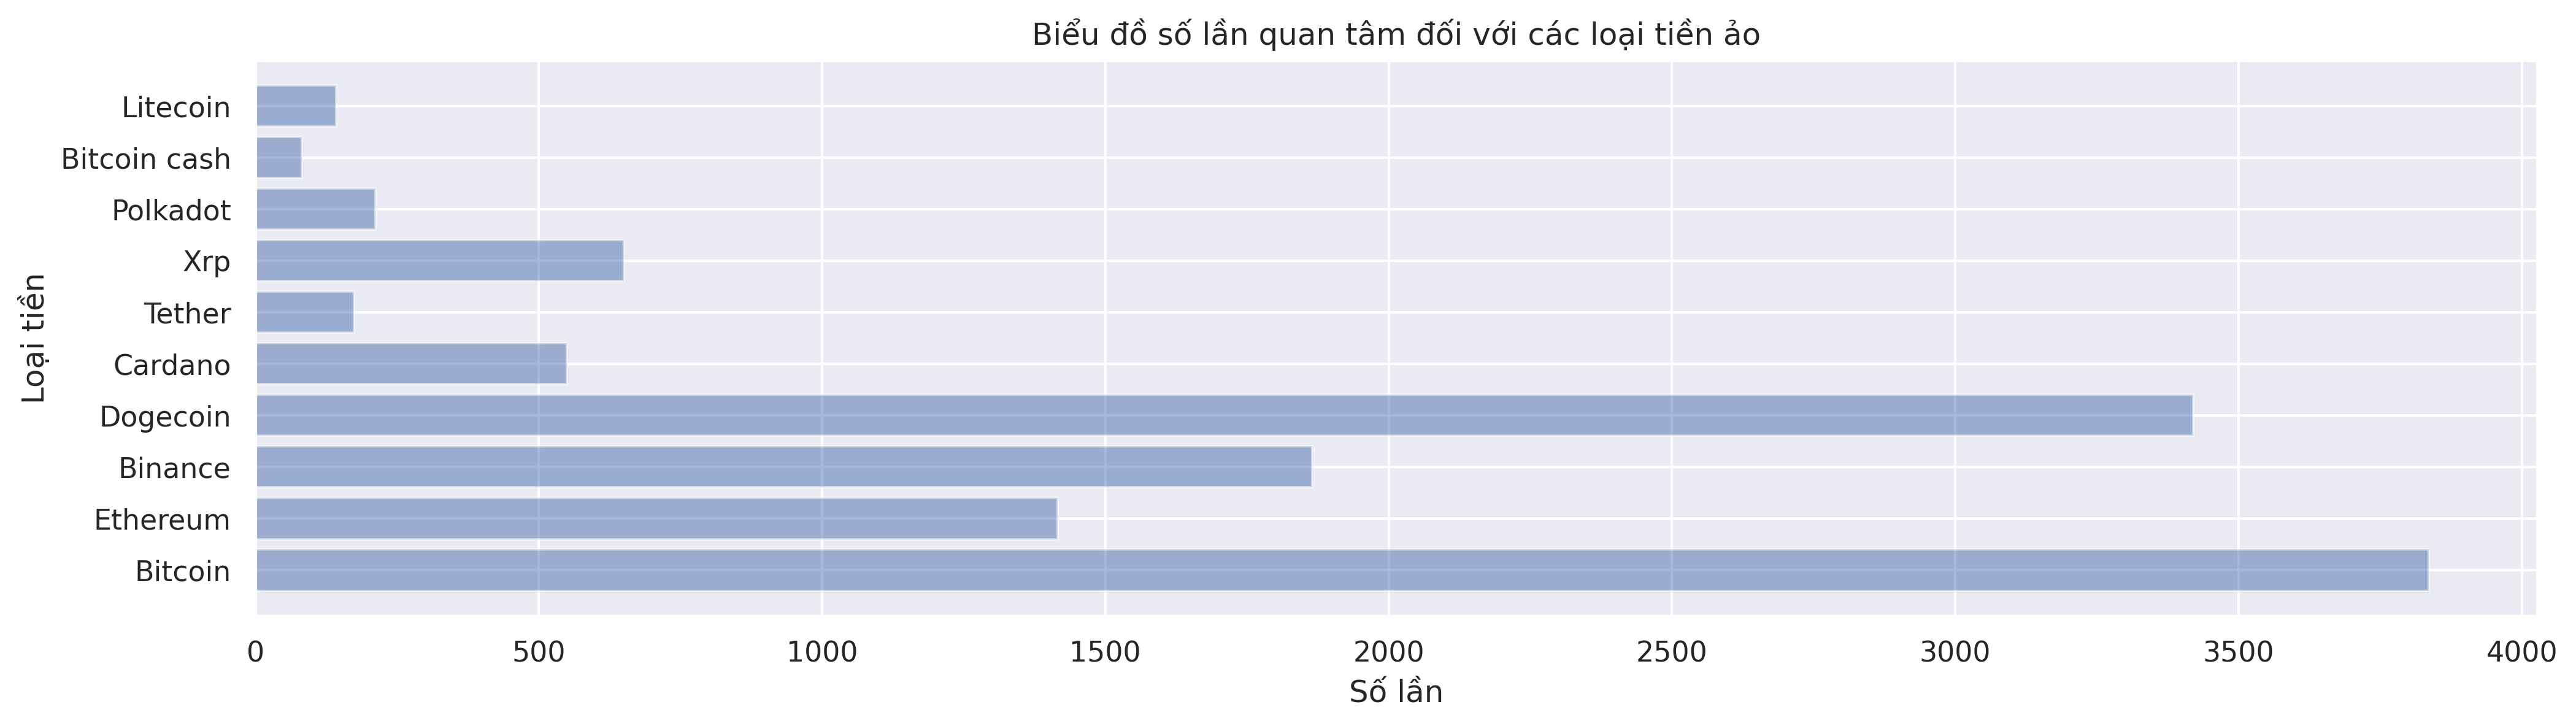

In [ ]:
# Bar chart
objects = ("Bitcoin","Ethereum","Binance","Dogecoin","Cardano","Tether","Xrp",
						"Polkadot","Bitcoin cash","Litecoin")
y_pos = np.arange(len(objects))
val = NumType['Total']
plt.figure(figsize=(16,4), dpi=300)
plt.barh(y_pos, val, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Số lần')
plt.ylabel('Loại tiền')
plt.title('Biểu đồ số lần quan tâm đối với các loại tiền ảo')

plt.show()

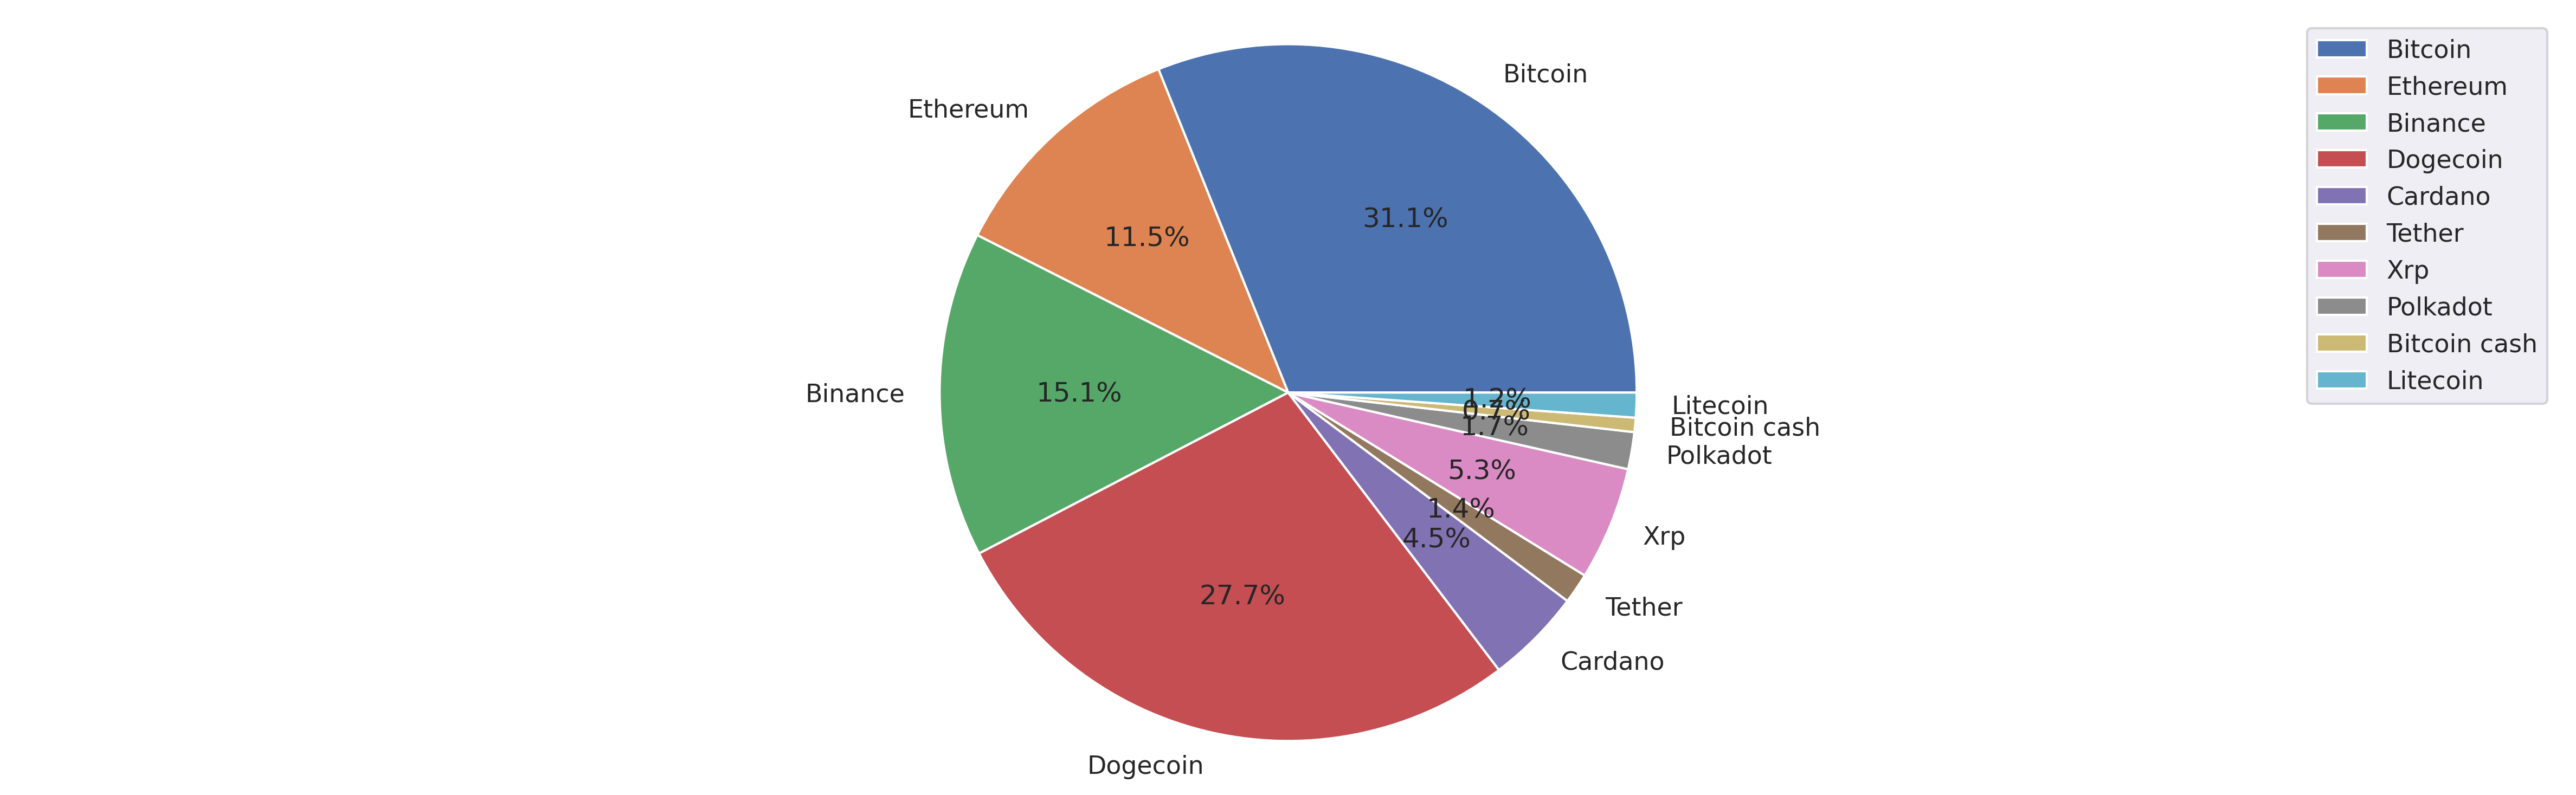

In [ ]:
import matplotlib.pyplot as plt

labels = objects
sizes = NumType['Total']
plt.figure(figsize=(16,5), dpi=300)
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

### 3. Vẽ Wordcloud thể hiện mức độ quan tâm theo theo cột nội dung

In [ ]:
# Vẽ theo shape
from PIL import Image
import numpy as np

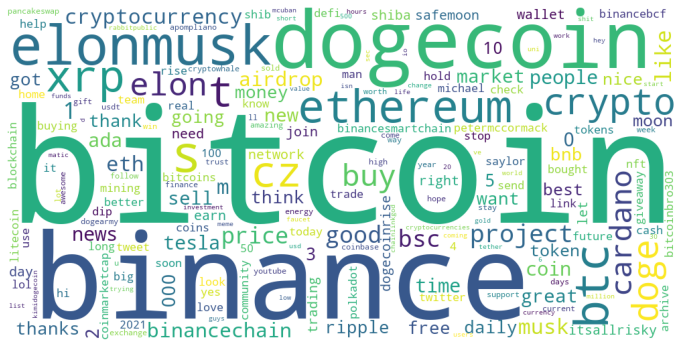

In [ ]:
# Vẽ wordcloud các cụm từ xuất hiện nhiều trong nội dung Twitter
arrContent=[]
for i in filtered_sentence.split('.'): # chuỗi sau khi làm sạch và xóa Stopwords
  for j in i.split(' '):
    arrContent.append(j.strip())
word_could_dict=Counter(arrContent)
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate_from_frequencies(word_could_dict)
wordcloud.to_file('4_3_wordcloud.png')
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

### 4. Bảng thống kê mức độ quan tâm theo Hashtag

In [ ]:
#data['Hashtags']
dataHT= pd.DataFrame({"Hashtags": data['Hashtags']})
dataHT

,Hashtags
0,[Cardano]
1,[]
2,[]
3,"[Cardano, ada]"
4,[cardano]
...,...
6213,"[crypto, bitcoin]"
6214,[]
6215,[]
6216,"[ethereum, freeeth, geteth]"


In [ ]:
txt2=""
txt3=""
for i in dataHT['Hashtags']:
  txt2+= i +" "
for k in txt2:
  txt3 += re.sub(r"[^a-zA-Z0-9]+",' ',k)
arr= txt3.lower().split(" ")
arrHT=[]
for i in arr:
  if(i!=""):
    arrHT.append(i)

# tổng số lượt nhắc đến của Hashtag
dem=Counter(arrHT).most_common()[:20]
dem

[('bitcoin', 969),
 ('dogecoin', 439),
 ('xrp', 208),
 ('ethereum', 201),
 ('binance', 189),
 ('btc', 182),
 ('bsc', 138),
 ('crypto', 138),
 ('doge', 137),
 ('cryptocurrency', 134),
 ('ripple', 110),
 ('cardano', 101),
 ('airdrop', 73),
 ('binancesmartchain', 66),
 ('bnb', 63),
 ('eth', 63),
 ('ada', 61),
 ('elonmusk', 49),
 ('defi', 49),
 ('dogecoinrise', 44)]

In [ ]:
a=[]
b=[]
for i in dem:
  a.append(i[0])
  b.append(i[1])
dataHT2= pd.DataFrame({"Hashtags": a,"Total":b})
dataHT2.sort_values('Total')[10:] #10 hashtags có lượt nhắc đến cao nhất

,Hashtags,Total
9,cryptocurrency,134
8,doge,137
7,crypto,138
6,bsc,138
5,btc,182
4,binance,189
3,ethereum,201
2,xrp,208
1,dogecoin,439
0,bitcoin,969


### 5. Biểu đồ thống kê mức độ quan tâm theo Hashtag

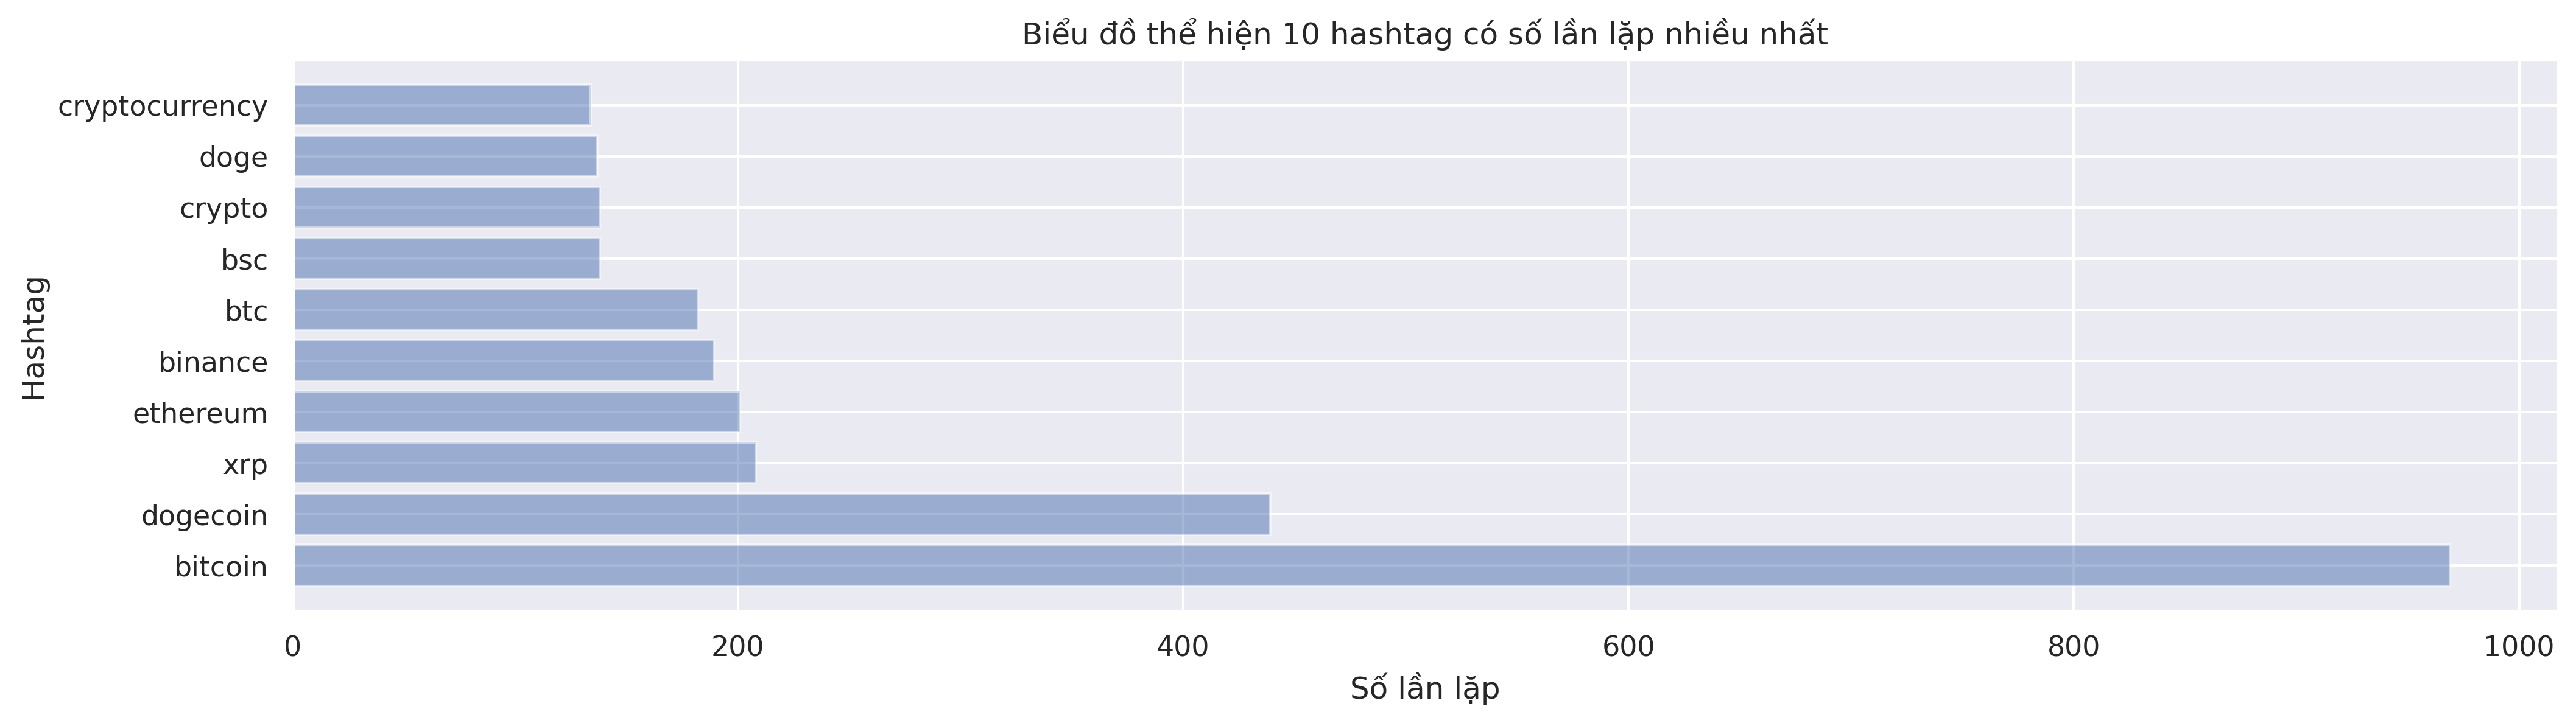

In [ ]:
# Bar chart
objects = dataHT2['Hashtags'][:10]
y_pos = np.arange(len(objects))
val = dataHT2['Total'][:10]
plt.figure(figsize=(16,4), dpi=300)
plt.barh(y_pos, val, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Số lần lặp')
plt.ylabel('Hashtag')
plt.title('Biểu đồ thể hiện 10 hashtag có số lần lặp nhiều nhất')

plt.show()

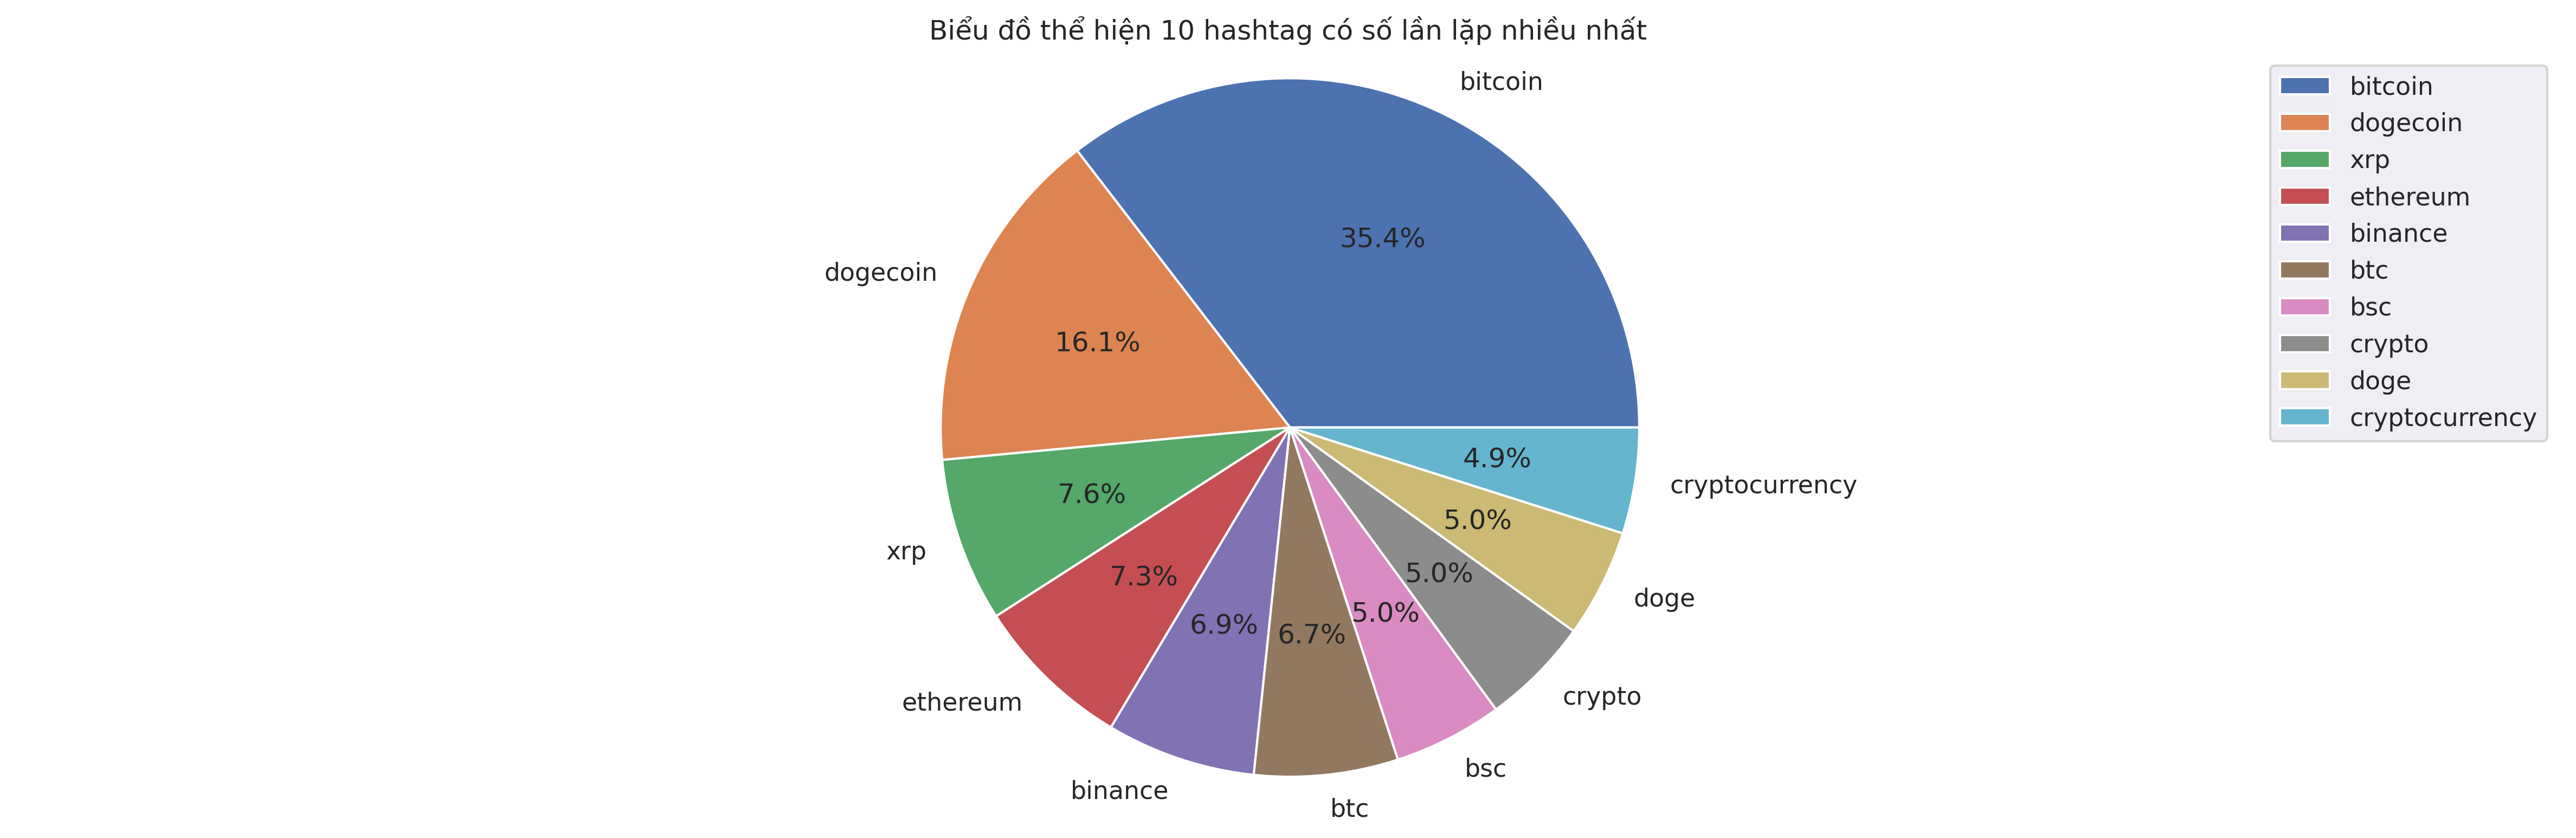

In [ ]:
import matplotlib.pyplot as plt 
labels = objects
sizes = dataHT2['Total'][:10]
plt.figure(figsize=(16,5), dpi=300)
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.title('Biểu đồ thể hiện 10 hashtag có số lần lặp nhiều nhất')
plt.show()

### 6. Wordcloud thống kê mức độ quan tâm theo Hashtag

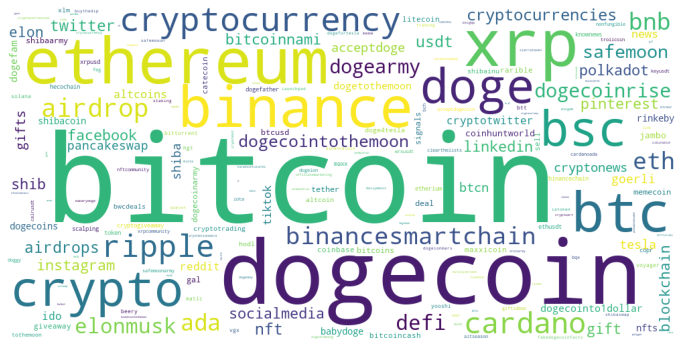

In [ ]:
word_could_dict=Counter(arrHT)
wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate_from_frequencies(word_could_dict)
wordcloud.to_file('4_6_wordcloud.png')
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()